**1η Εργαστηριακή Άσκηση στο μάθημα Ψηφιακή Επεξεργασία Σήματος 2024**

| Ονοματεπώνυμα | ΑΜ |
|----------------|----|
| Γεώργιος Αλέξανδρος Γεωργαντζάς        | 03120017 |
| Βλάσιος Σκουλής        | 03120065 |

**Μέρος 1ο - Σύστημα Εντοπισμού Τηλεφωνικών Τόνων (Telephone Touch – Tones)**

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io.wavfile import write
import scipy as sp
import IPython
import soundfile as sf

In [35]:
import numpy as np
import IPython.display

samplerate = 8192
w_row = np.array([0.5346, 0.5906, 0.6535, 0.7217])
w_column = np.array([0.9273, 1.0247, 1.1328])

# Create radial frequency matrix
w = np.empty((10, 2))
for i in range(3):
    for j in range(3):
        w[i * 3 + j + 1] = [w_row[i], w_column[j]]

w[0] = [w_row[3], w_column[1]]

L = 1000
t = np.linspace(0, L-1, L)
d = np.zeros((L, 10))

# Generate signals
for j in range(10):
    d[:, j] = np.sin(w[j][0] * t) + np.sin(w[j][1] * t)
    IPython.display.display(IPython.display.Audio(d[:, j], rate=samplerate))

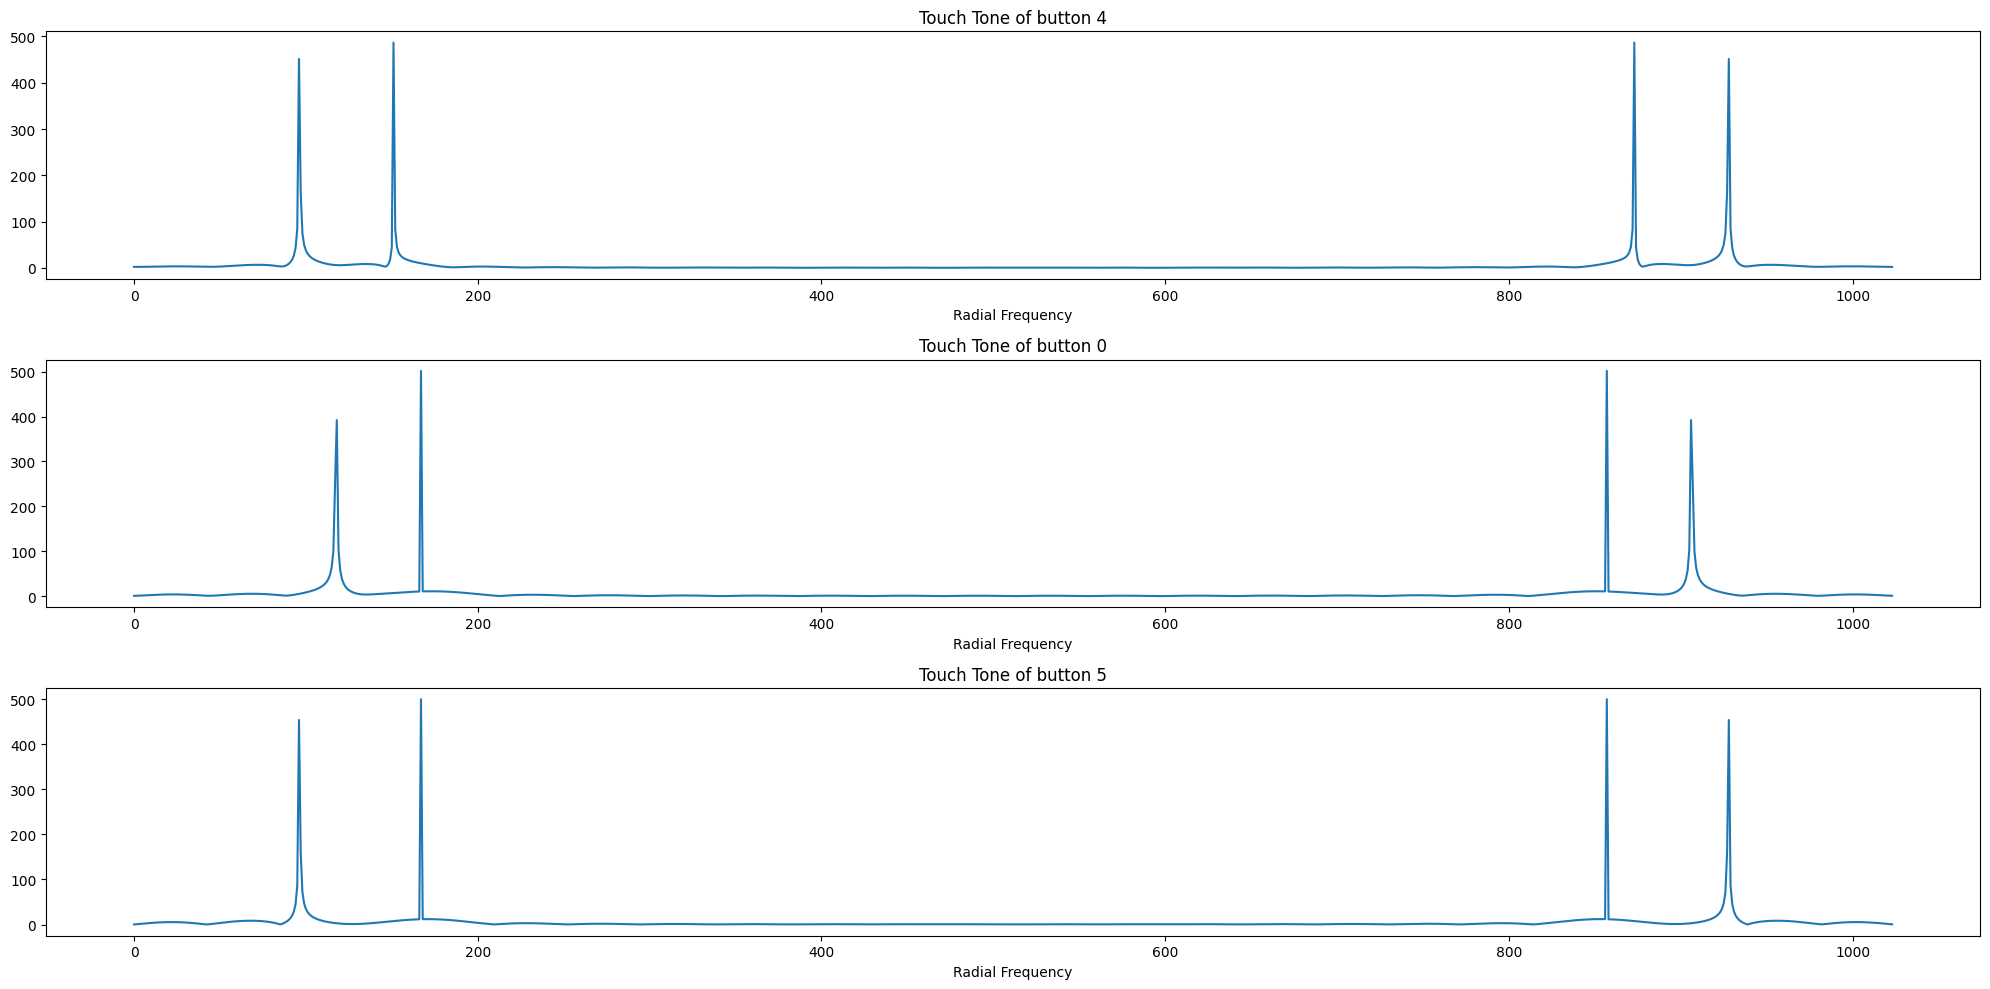

In [36]:
# 1.2

N = 1024

D4 = np.fft.fft(d[:, 4], N)
D5 = np.fft.fft(d[:, 5], N)
D0 = np.fft.fft(d[:, 0], N)

f = np.linspace(0, N-1, N)
fig = plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
plt.plot(f, abs(D4))
plt.title('Touch Tone of button 4')
plt.xlabel('Radial Frequency')

plt.subplot(3, 1, 2)
plt.plot(f, abs(D0))
plt.title('Touch Tone of button 0')
plt.xlabel('Radial Frequency')

plt.subplot(3, 1, 3)
plt.plot(f, abs(D5))
plt.title('Touch Tone of button 5')
plt.xlabel('Radial Frequency')

plt.tight_layout()
plt.show()


In [37]:
## 1.3
# 03120017+03120065 = 06240082

num = [0, 6, 2, 4, 0, 0, 8, 2]
totalSignal = []
for i in num:
    ith_signal = d[:, i]
    totalSignal.extend(ith_signal)
    totalSignal.extend(np.zeros(100))

#totalSignal = np.array(totalSignal)
sf.write("tone_sequence.wav", totalSignal, samplerate)
IPython.display.display(IPython.display.Audio(totalSignal,rate=samplerate))

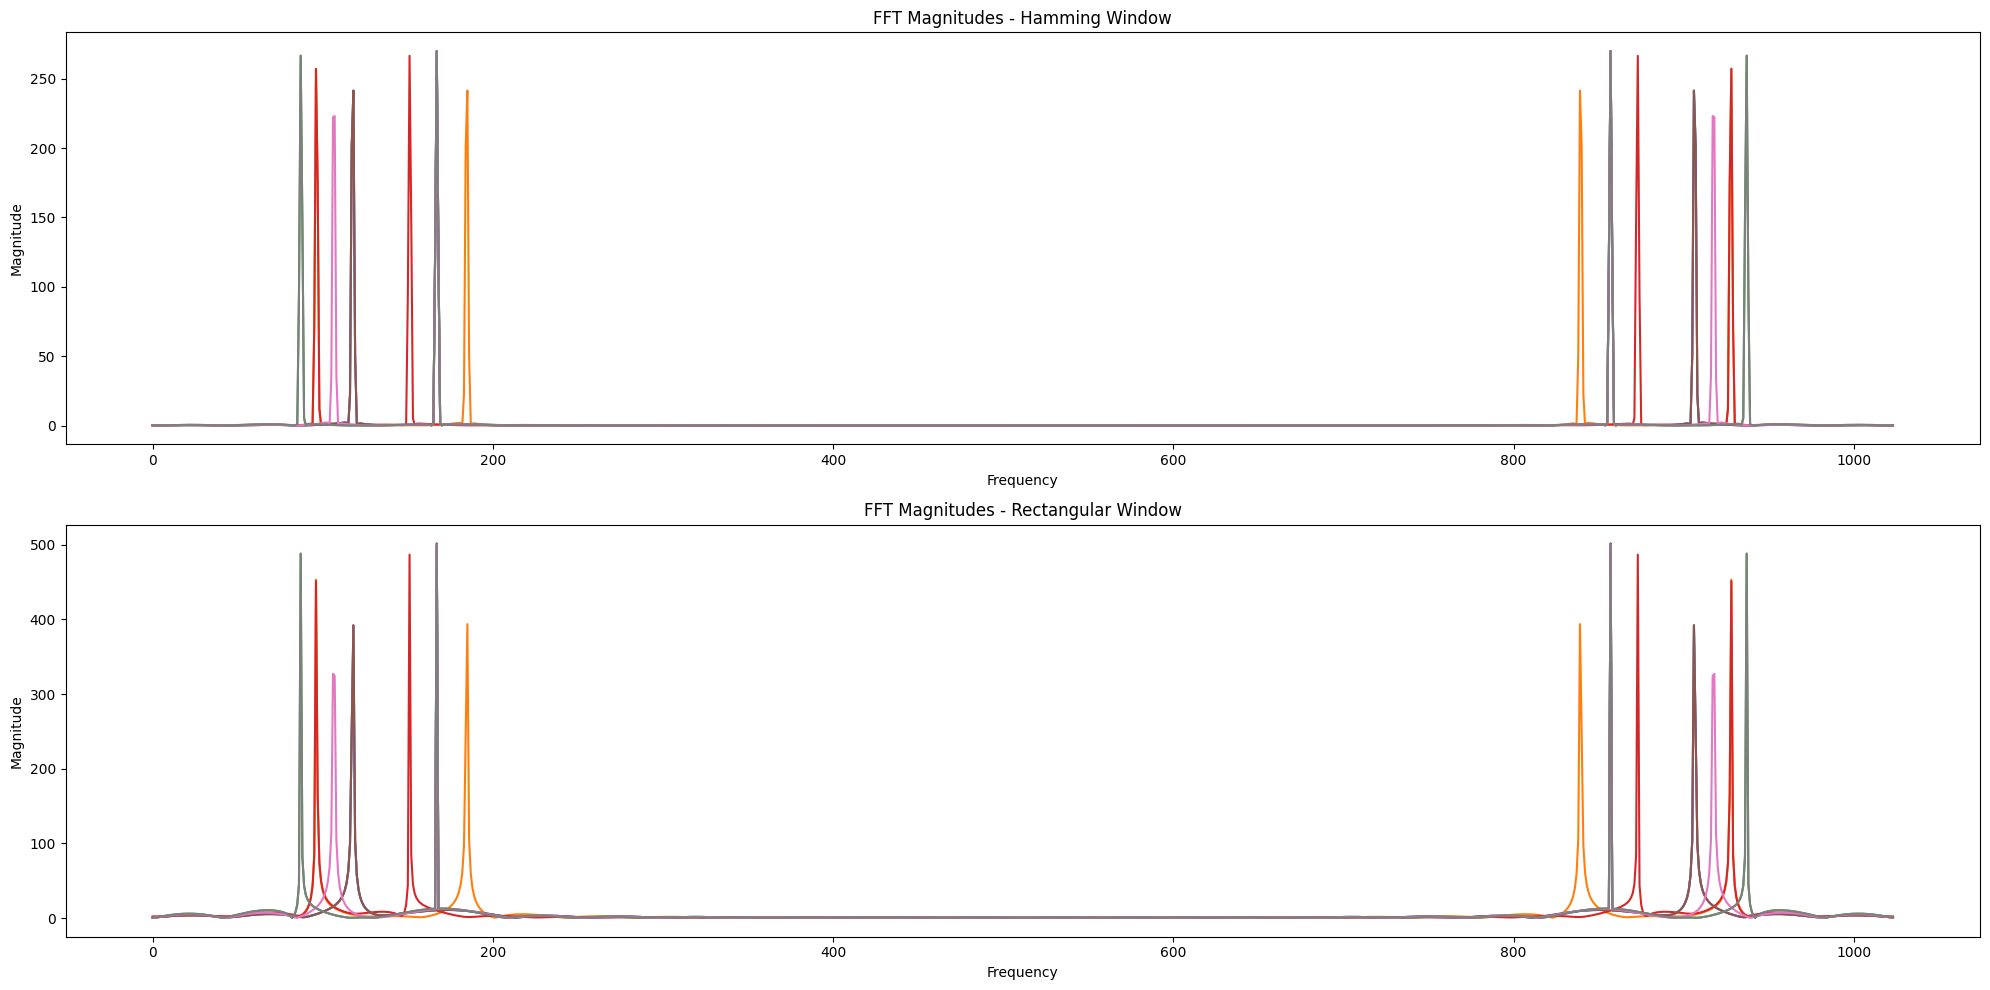

In [38]:
## 1.4

from scipy.signal.windows import boxcar

# Define parameters
L = 1000  # Length of each window
N = 1024  # FFT size
hop_size = 100  # Hop size between windows

# Create Hamming and rectangular windows
hamming = np.hamming(L)
rectangular = boxcar(L)

# Initialize lists to store FFT results
TS_h_list = []
TS_r_list = []

# Create two separate subplots for TS_h and TS_r
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

# Segment total signal into windows, apply windows, and compute FFT
for i in range(0, len(totalSignal), L+hop_size):
    window_h = totalSignal[i:i+L] * hamming
    window_r = totalSignal[i:i+L] * rectangular
    TS_h = np.fft.fft(window_h, N)
    TS_r = np.fft.fft(window_r, N)
    TS_h = np.abs(TS_h)
    TS_r = np.abs(TS_r)
    axes[0].plot(TS_h)  # Plot TS_h in the first subplot
    axes[1].plot(TS_r)  # Plot TS_r in the second subplot
    TS_h_list.append(TS_h)
    TS_r_list.append(TS_r)

TS_h_list = np.array(TS_h_list)
TS_r_list = np.array(TS_r_list)
# Add titles and labels
axes[0].set_title('FFT Magnitudes - Hamming Window')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Magnitude')
axes[1].set_title('FFT Magnitudes - Rectangular Window')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Magnitude')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [39]:
print(TS_h_list.shape)

(8, 1024)


In [40]:
## 1.5

# Input: Array of frequencies (k)
# Output: Array only of the normalized frequencies which are close to the tone frequencies 
# -- not dulpicate values --
def getTonesFromFreqs_noDuplicates(givenlist, N = 1024):
    freq = [0.5346, 0.5906, 0.6535, 0.7217, 0.9273, 1.0247, 1.1328]
    givenlist = [(x * 2 * np.pi / N) for x in givenlist]
    middle_points = [0]*8
    tones = set() #set

    for i in range(6):
        x = (freq[i]+freq[i+1])/2
        middle_points[i+1] = x
        #print(x - freq[i])

    middle_points[0] = freq[0] - 0.028
    middle_points[7] = freq[6] + 0.055
    #print(middle_points)

    for k in givenlist:
        for i in range(7):
            if (k > middle_points[i] and k < middle_points[i+1]):
                k = freq[i]
                tones.add(k)
                break
    return tones


# -- testing --
u = 1/(np.pi * 2)
ks = [0.5 , 0.6, 0.8, 0.342, 0.134, 1.234, 0.134, 1.243] # just an example for testing
ks = [(x * u * N) for x in ks]

print(getTonesFromFreqs_noDuplicates(ks))

{0.5906, 0.7217}


In [41]:
## 1.5

# Input: Array of frequencies (k)
# Output: Array only of the normalized frequencies which are close to the tone frequencies 
# -- not dulpicate values --
def getTonesFromFreqs_noDuplicates(givenlist, N = 1024):
    freq = [0.5346, 0.5906, 0.6535, 0.7217, 0.9273, 1.0247, 1.1328]
    givenlist = [(x * 2 * np.pi / N) for x in givenlist]
    middle_points = [0]*8
    tones = set() #set

    for i in range(6):
        x = (freq[i]+freq[i+1])/2
        middle_points[i+1] = x
        #print(x - freq[i])

    middle_points[0] = freq[0] - 0.028
    middle_points[7] = freq[6] + 0.055
    #print(middle_points)

    for k in givenlist:
        for i in range(7):
            if (k > middle_points[i] and k < middle_points[i+1]):
                k = freq[i]
                tones.add(k)
                break
    return tones


# -- testing --
u = 1/(np.pi * 2)
ks = [0.5 , 0.6, 0.8, 0.342, 0.134, 1.234, 0.134, 1.243] # just an example for testing
ks = [(x * u * N) for x in ks]

print(getTonesFromFreqs_noDuplicates(ks))

{0.5906, 0.7217}


In [42]:
## 1.6

def getTonesEnergy(signal, L=1000, N=1024):
    hamming = np.hamming(L)
    f = np.linspace(0, N-1, N)

    start_idx = 0
    signalsTones_h = np.zeros((L, 8))

    for i in range(8):
        end_idx = start_idx + 1000    
        signalsTones_h[:, i] = hamming*(signal[start_idx:end_idx])
        start_idx += 1100

    Energy_ST_h = np.zeros((N, 8))

    for i in range(8):
        Energy_ST_h[:, i] = abs(np.fft.fft(signalsTones_h[:, i], N))**2
   
    return Energy_ST_h

## -- TTDECODE --
def ttdecode(signal):
    energy_tones = getTonesEnergy(signal)
    Vector = []
    flag = False
    indexes = []
    length = energy_tones.shape[1]

    for i in range(length):
        indexes.append([])

    for j in range(length):
        goToSecond = False
        maxValue1 = 0
        maxValue2 = 0
        index1 = 0
        index2 = 0
        limit = 10000
        goToSecond = False
        for i in range(energy_tones.shape[0]):
            normalizedFreqs = []

            if goToSecond is False:
                if (energy_tones[i, j] > limit and not flag):
                    flag = True
                    #if(maxValue < energy_tones[i, j]):
                if flag:
                    if energy_tones[i, j] < limit:
                        goToSecond = True
                        flag = False
                    else:
                        if(maxValue1 < energy_tones[i, j]):
                            maxValue1 = energy_tones[i, j]
                            index1 = i
            elif goToSecond:
                if (energy_tones[i, j] > limit and not flag):
                    flag = True
                    #if(maxValue < energy_tones[i, j]):
                if flag:
                    if energy_tones[i, j] < limit:
                        flag = False
                        break
                    else:
                        if(maxValue2 < energy_tones[i, j]):
                            maxValue2 = energy_tones[i, j]
                            index2 = i 
        normalizedFreqs.append(index1)
        normalizedFreqs.append(index2)
        digits_freqs_set = getTonesFromFreqs_noDuplicates(normalizedFreqs)
        digits_freqs = list(digits_freqs_set)

        index = 0
        w = [] # list [[w_row_4, w_column_2], [w_row_1, w_column_1], ..., [w_row_3, w_column_3]]


        for i in range(10):
            w.append([])

        k = 1
        for i in range(3):
            for j in range(3):
                w[k].append(w_row[i])
                w[k].append(w_column[j])
                k += 1

        w[0].append(w_row[3])
        w[0].append(w_column[1])
        for freqsCouple in w:
            if digits_freqs == freqsCouple:
                Vector.append(index)
                break
            index += 1
    return Vector


print(ttdecode(totalSignal))    


[0, 6, 2, 4, 0, 0, 8, 2]


In [43]:
## 1.7

easy_sig = np.load('./dsp24_lab1_Data/easy_sig.npy')
vec1 = ttdecode(easy_sig)
print(vec1)

medium_sig = np.load('./dsp24_lab1_Data/medium_sig.npy')
vec3 = ttdecode(medium_sig)
print(vec3)

hard_sig = np.load('./dsp24_lab1_Data/hard_sig.npy')
vec2 = ttdecode(hard_sig)
print(vec2)

[9, 3, 9, 2, 6, 8, 4, 8]
[2, 7, 3, 3, 2, 5, 4, 2]
[6, 9, 2, 6, 3, 1, 9, 9]


**Μέρος 2ο - Χαρακτηριστικά Βραχέος Χρόνου Σημάτων Φωνής και Μουσικής**

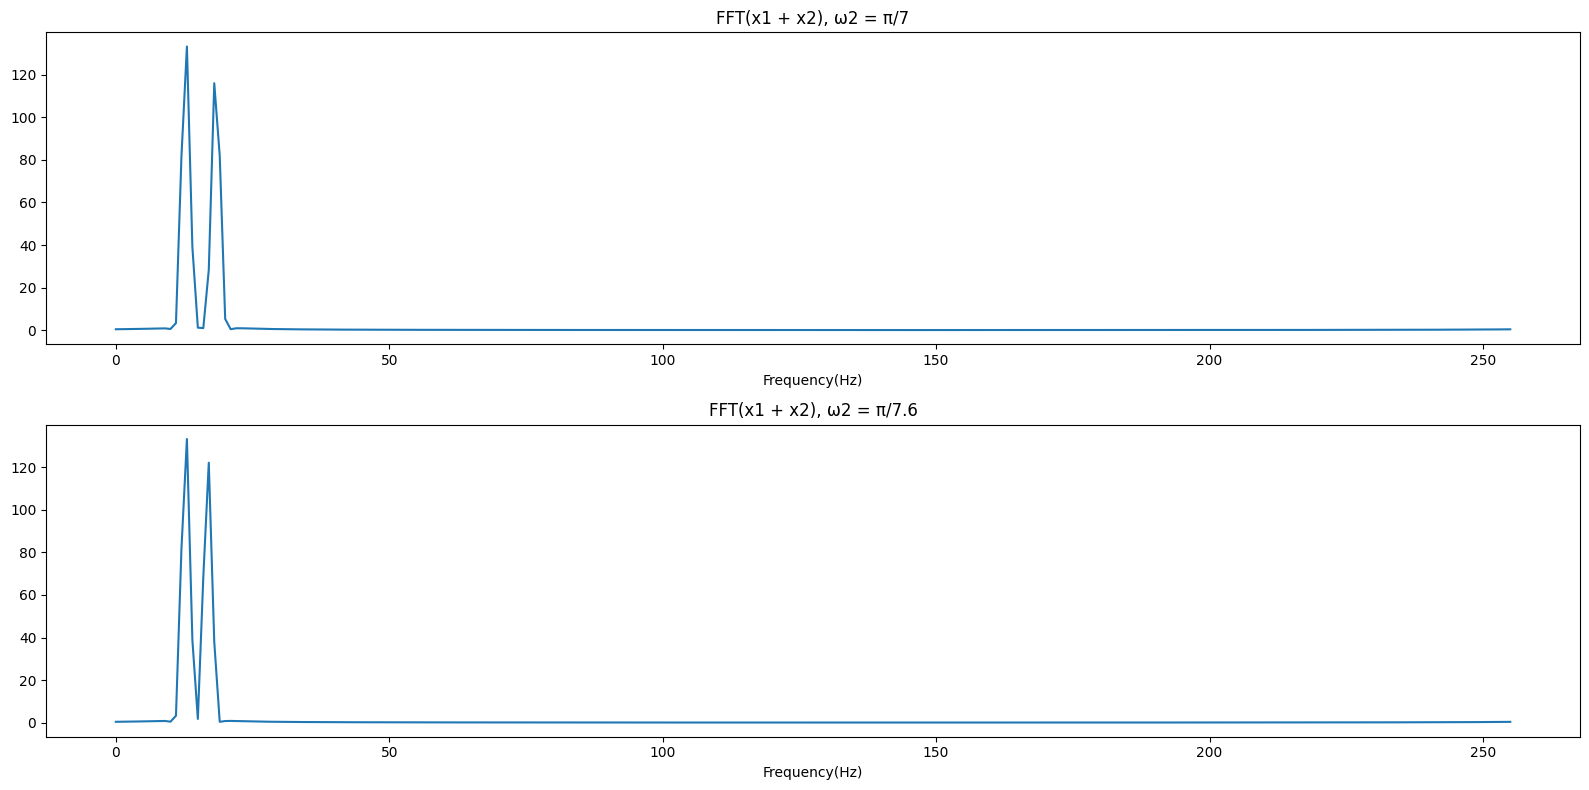

In [44]:
## 2.1

L = 256
N = 256

n = np.linspace(0, L-1, L)
A1 = 1
A2 = 0.9
w1 = np.pi/10
w2 = np.pi/7
w2_limit = np.pi/7.6
phi1 = np.pi/7
phi2 = np.pi/3

x1 = A1 * np.exp(1j*(w1*n + phi1))
x2 = A2 * np.exp(1j*(w2*n + phi2))
x2_limit = A2 * np.exp(1j*(w2_limit*n + phi2))
x = x1 + x2
x_limit = x1 + x2_limit

h = np.hamming(N)
y = x * h
y_limit = x_limit * h

f = np.linspace(0, N-1, N)
Y = np.fft.fft(y, N)
Y_limit = np.fft.fft(y_limit, N)

fig = plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
plt.plot(f, abs(Y))
plt.xlabel('Frequency(Hz)')
plt.title('FFT(x1 + x2), ω2 = π/7')

plt.subplot(2, 1, 2)
plt.plot(f, abs(Y_limit))
plt.xlabel('Frequency(Hz)')
plt.title('FFT(x1 + x2), ω2 = π/7.6')
plt.tight_layout()

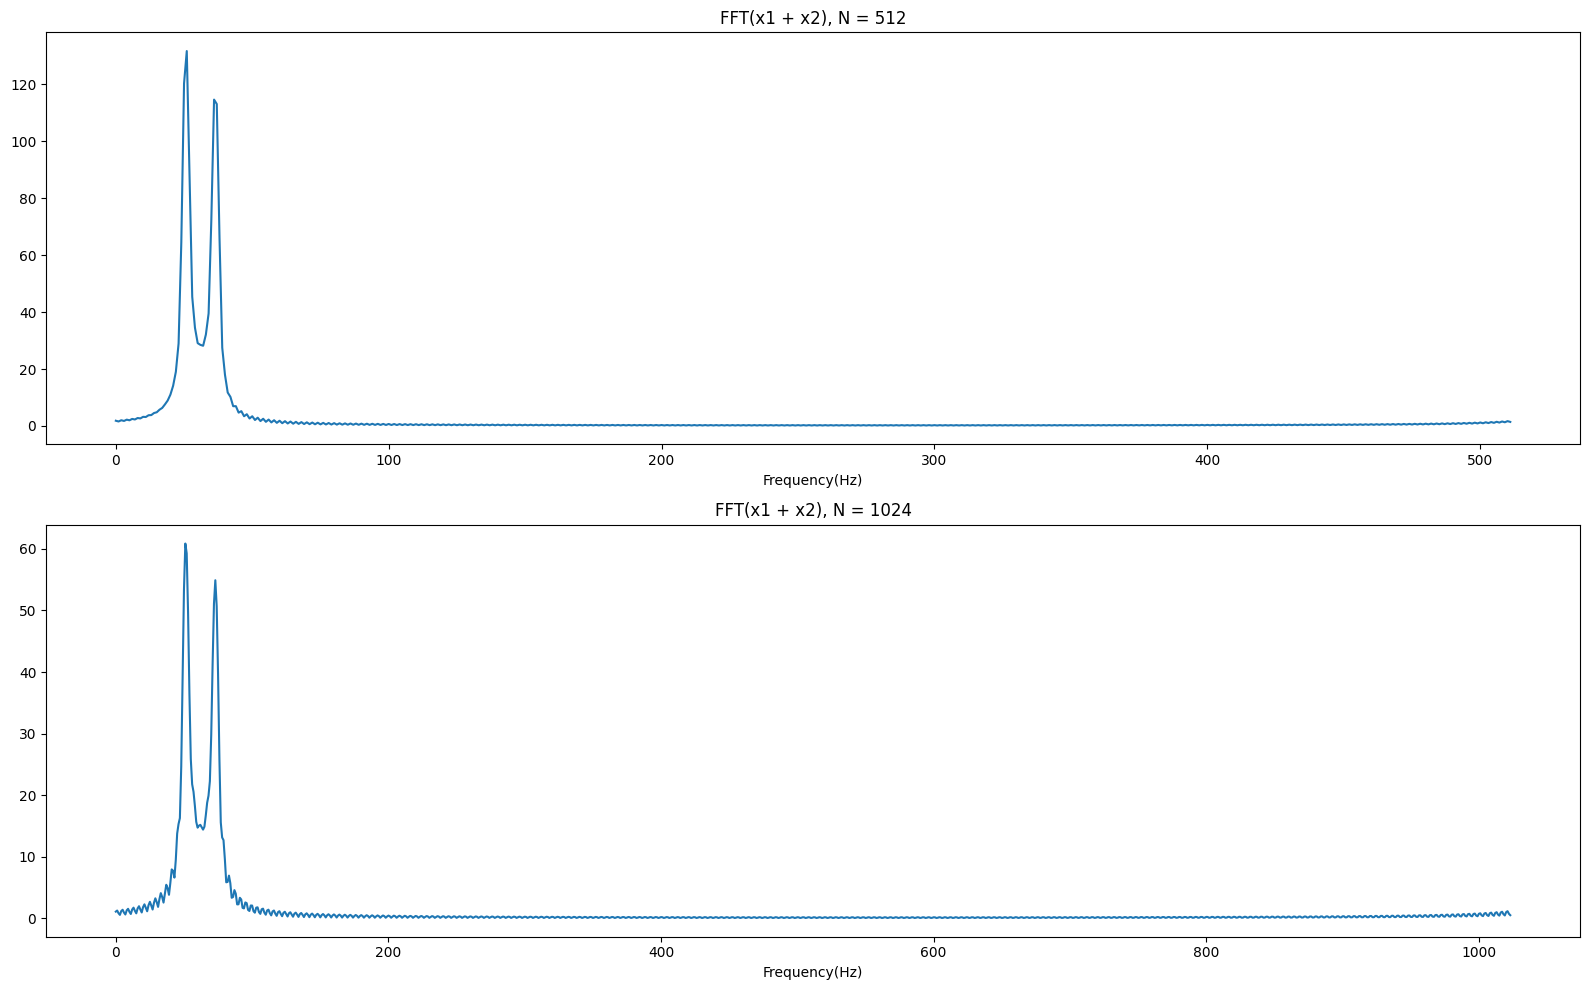

In [45]:
## 2.2

N = [512, 1024]
L = 256
n = np.linspace(0, L-1, L)
fig = plt.figure(figsize=(16,10))
j = 1
x1 = A1 * np.exp(1j*(w1*n + phi1))
x2 = A2 * np.exp(1j*(w2*n + phi2))
x = x1 + x2
    
for i in N:
    h = np.hamming(i)
    x = np.pad(x, (0, abs(i-len(x))), 'constant')
    y = x * h
    
    f = np.linspace(0, i-1, i)
    Y = np.fft.fft(y, i)
    plt.subplot(2, 1, j)
    plt.plot(f, abs(Y))
    plt.xlabel('Frequency(Hz)')
    plt.title('FFT(x1 + x2), N = %i' %i)
 
    j += 1

plt.tight_layout()

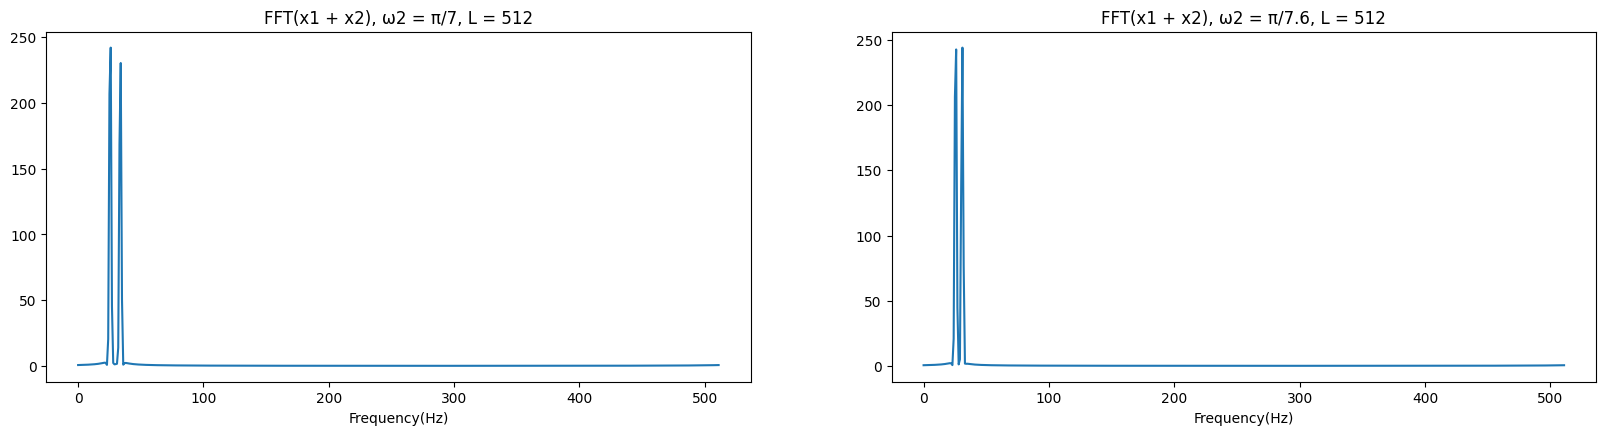

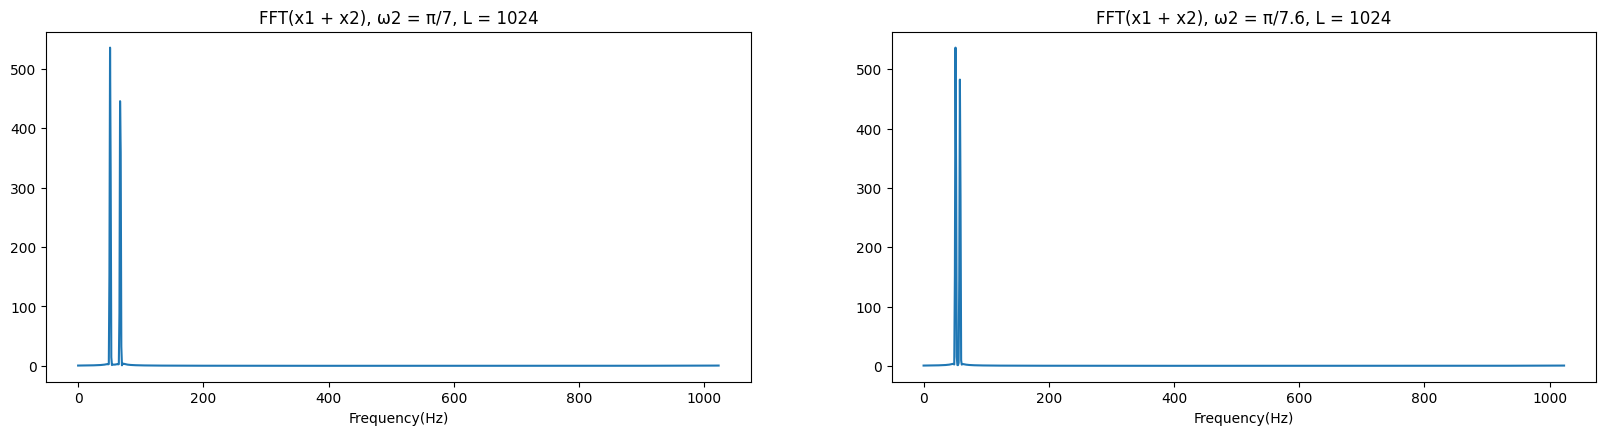

In [46]:
## 2.3

L = [512, 1024]
N = [512, 1024]
limits = [np.pi/8.3, np.pi/8.8]

j = 1
for i in L:
    n = np.linspace(0, i-1, i)
    A1 = 1
    A2 = 0.9
    w1 = np.pi/10
    w2 = np.pi/7.6 #previous limit
    w2_limit = limits[j-1]
    phi1 = np.pi/7
    phi2 = np.pi/3

    x1 = A1 * np.exp(1j*(w1*n + phi1))
    x2 = A2 * np.exp(1j*(w2*n + phi2))
    x2_limit = A2 * np.exp(1j*(w2_limit*n + phi2))
    x = x1 + x2
    x_limit = x1 + x2_limit

    h = np.hamming(i)
    y = x * h
    y_limit = x_limit * h

    f = np.linspace(0, i-1, i)
    Y = np.fft.fft(y, i)
    Y_limit = np.fft.fft(y_limit, i)


    fig = plt.figure(figsize=(20, 10))
    plt.subplot(2, 2, 2*j - 1)
    plt.plot(f, abs(Y))
    plt.xlabel('Frequency(Hz)')
    plt.title('FFT(x1 + x2), ω2 = π/7, L = %i' %i)

    plt.subplot(2, 2, 2*j)
    plt.plot(f, abs(Y_limit))
    plt.xlabel('Frequency(Hz)')
    plt.title('FFT(x1 + x2), ω2 = π/7.6, L = %i' %i)
    j += 1

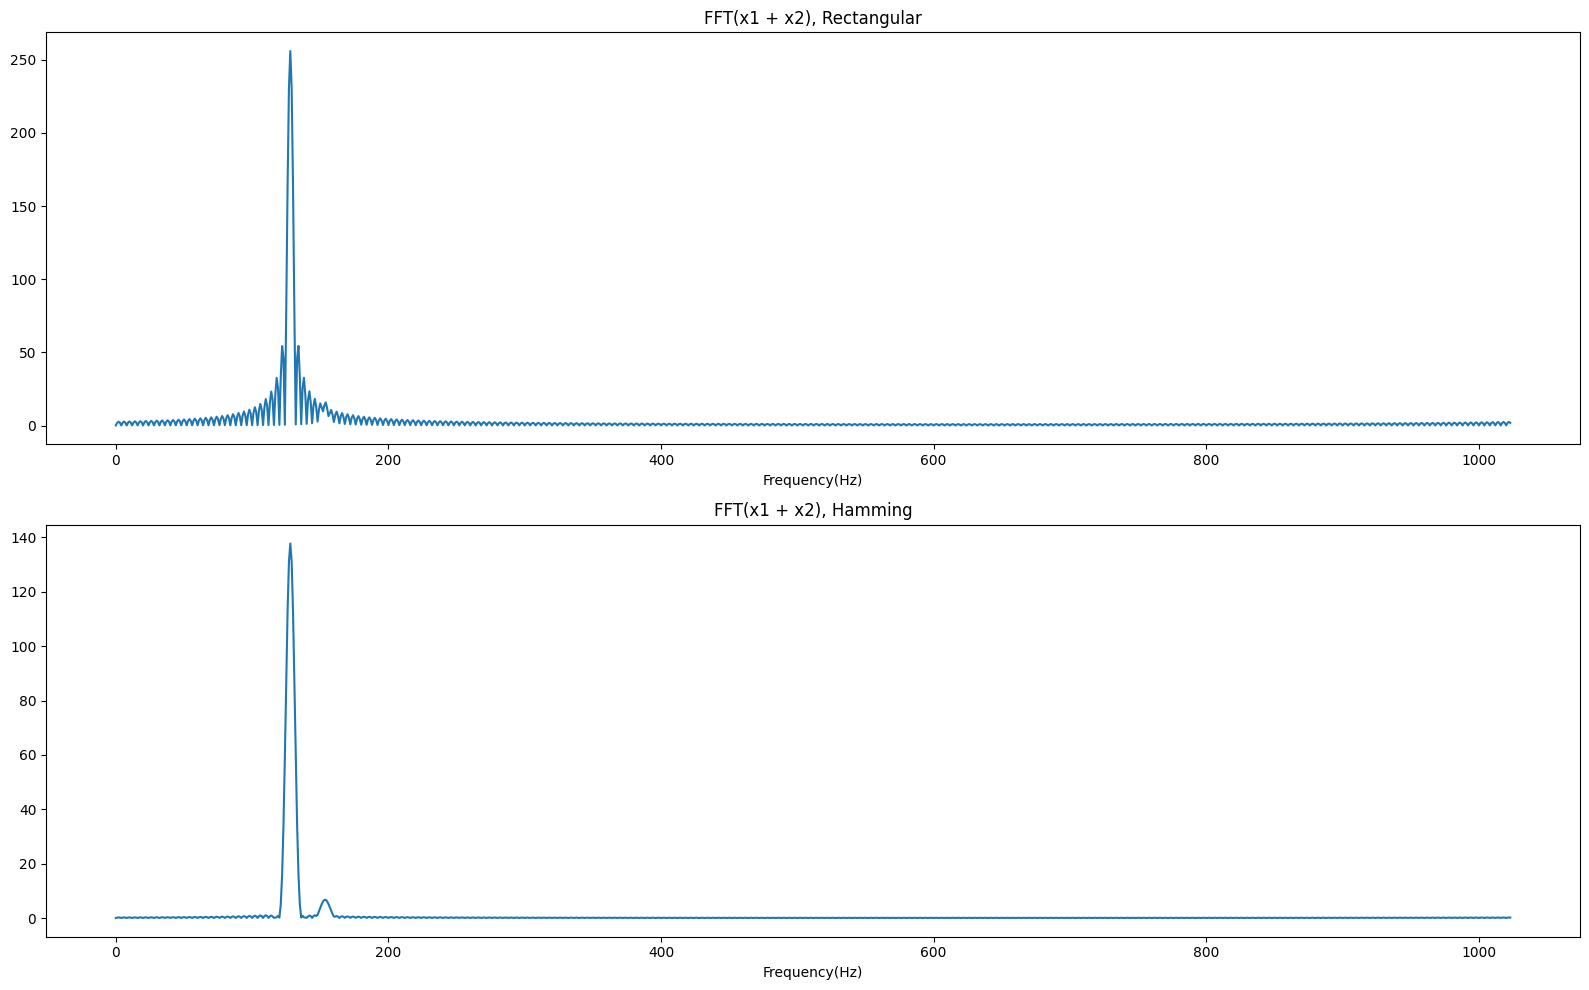

In [47]:
## 2.4

L = 256
N = 1024

n = np.linspace(0, L-1, L)
A1 = 1
A2 = 0.05
w1 = 0.25*np.pi
w2 = 0.3*np.pi

phi1 = np.pi/7
phi2 = np.pi/3

x1 = A1 * np.exp(1j*(w1*n + phi1))
x2 = A2 * np.exp(1j*(w2*n + phi2))
x = x1 + x2

hamming = np.hamming(L)
rectangular = signal.windows.boxcar(L)
y_h = x * hamming
y_r = x * rectangular

f = np.linspace(0, N-1, N)
Y_h = np.fft.fft(y_h, N)
Y_r = np.fft.fft(y_r, N)

fig = plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
plt.plot(f, abs(Y_r))
plt.xlabel('Frequency(Hz)')
plt.title('FFT(x1 + x2), Rectangular')

plt.subplot(2, 1, 2)
plt.plot(f, abs(Y_h))
plt.xlabel('Frequency(Hz)')
plt.title('FFT(x1 + x2), Hamming')

plt.tight_layout()

***Μέρος 3ο - Ψηφιακή Επεξεργασία και Φασματική Ανάλυση Βιοσημάτων Κητωδών***